In [13]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
#import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
DATADIR = "C:/Users/Windows/Documents/MAT4906-fall21/Finial Project/datasets/asl_dataset"
#CATEGORIES = ["3", "4", "5", "6","7","8","9"]
CATEGORIES = ["a", "b", "c"]

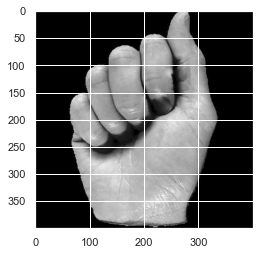

In [7]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

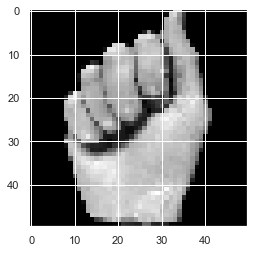

In [8]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [36]:
training_data = []
num_img_perclass = []
def create_training_data():
    for category in CATEGORIES:
        count = 0
        path = os.path.join(DATADIR, category)
        class_num = pd.Categorical(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                count = count + 1
            except Exception as e:
                pass
        num_img_perclass.append(count)    
    return training_data

training_data = create_training_data()

210
(50, 50)


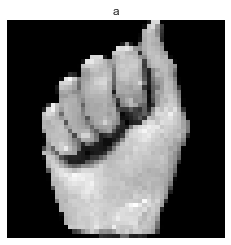

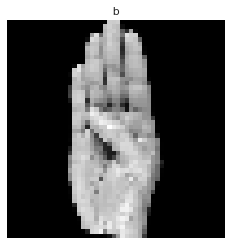

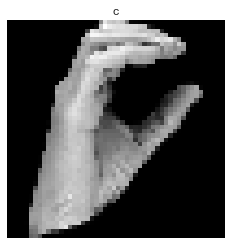

In [42]:
print(len(training_data))
print(training_data[0][0].shape)

#plt.imshow(training_data[93][0], cmap = 'gray')
#plt.show()
label_data = []
num_of_classes = len(num_img_perclass)
for img in range(0,num_of_classes):
    plt.imshow(training_data[num_img_perclass.__getitem__(img)*img][0], cmap = 'gray')
    plt.title(training_data[num_img_perclass.__getitem__(img)*img][1][0])
    plt.axis('off')
    plt.show()
#Convert to categorical#
#y = to_categorical(labels)
#print(y)
#labels

In [57]:
# Creating data for training and testing; taking 80% of data for training per class.
image_train = []
label_train = []
for features, label in training_data:
    image_train.append(features)
    label_train.append(label[0])

X_train, X_validation, y_train, y_validation = train_test_split(image_train, label_train, test_size=0.2, shuffle=True)

# start_img = 0
# end_img = 0
# end_img = num_img_perclass.__getitem__(0) + end_img -1
# images = training_data[1][0]
# labels = training_data[start_img:end_img][1][0]
# for img in range(0,num_of_classes):
#     end_img = num_img_perclass.__getitem__(img) + end_img
#     X_train, X_validation, y_train, y_validation = train_test_split(training_data[start_img:end_img][0], training_data[start_img:end_img][1][0], 
#                                                                     test_size=0.2, shuffle=True)
#     start_img = start_img + end_img -1